### The Mandelbrot Set Iteration

The Mandelbrot set is given as the iteration of the following equations
$$
z_{n+1} = z^2_n + c
$$

Where:
* $z_0$ = 0 (starting value)
* $c$ is a complex number, where each unique $c$ will yield a different sequence of $z$ values

A point $c$ is in the Mandelbort set if, after iterating the equation multiple times, $|z|$ (the magnitude of $Z$) stays bounded (specifically, it remains $\leq$ 2). If $|z|$ escapes beyond 2, $c$ is not part of the set

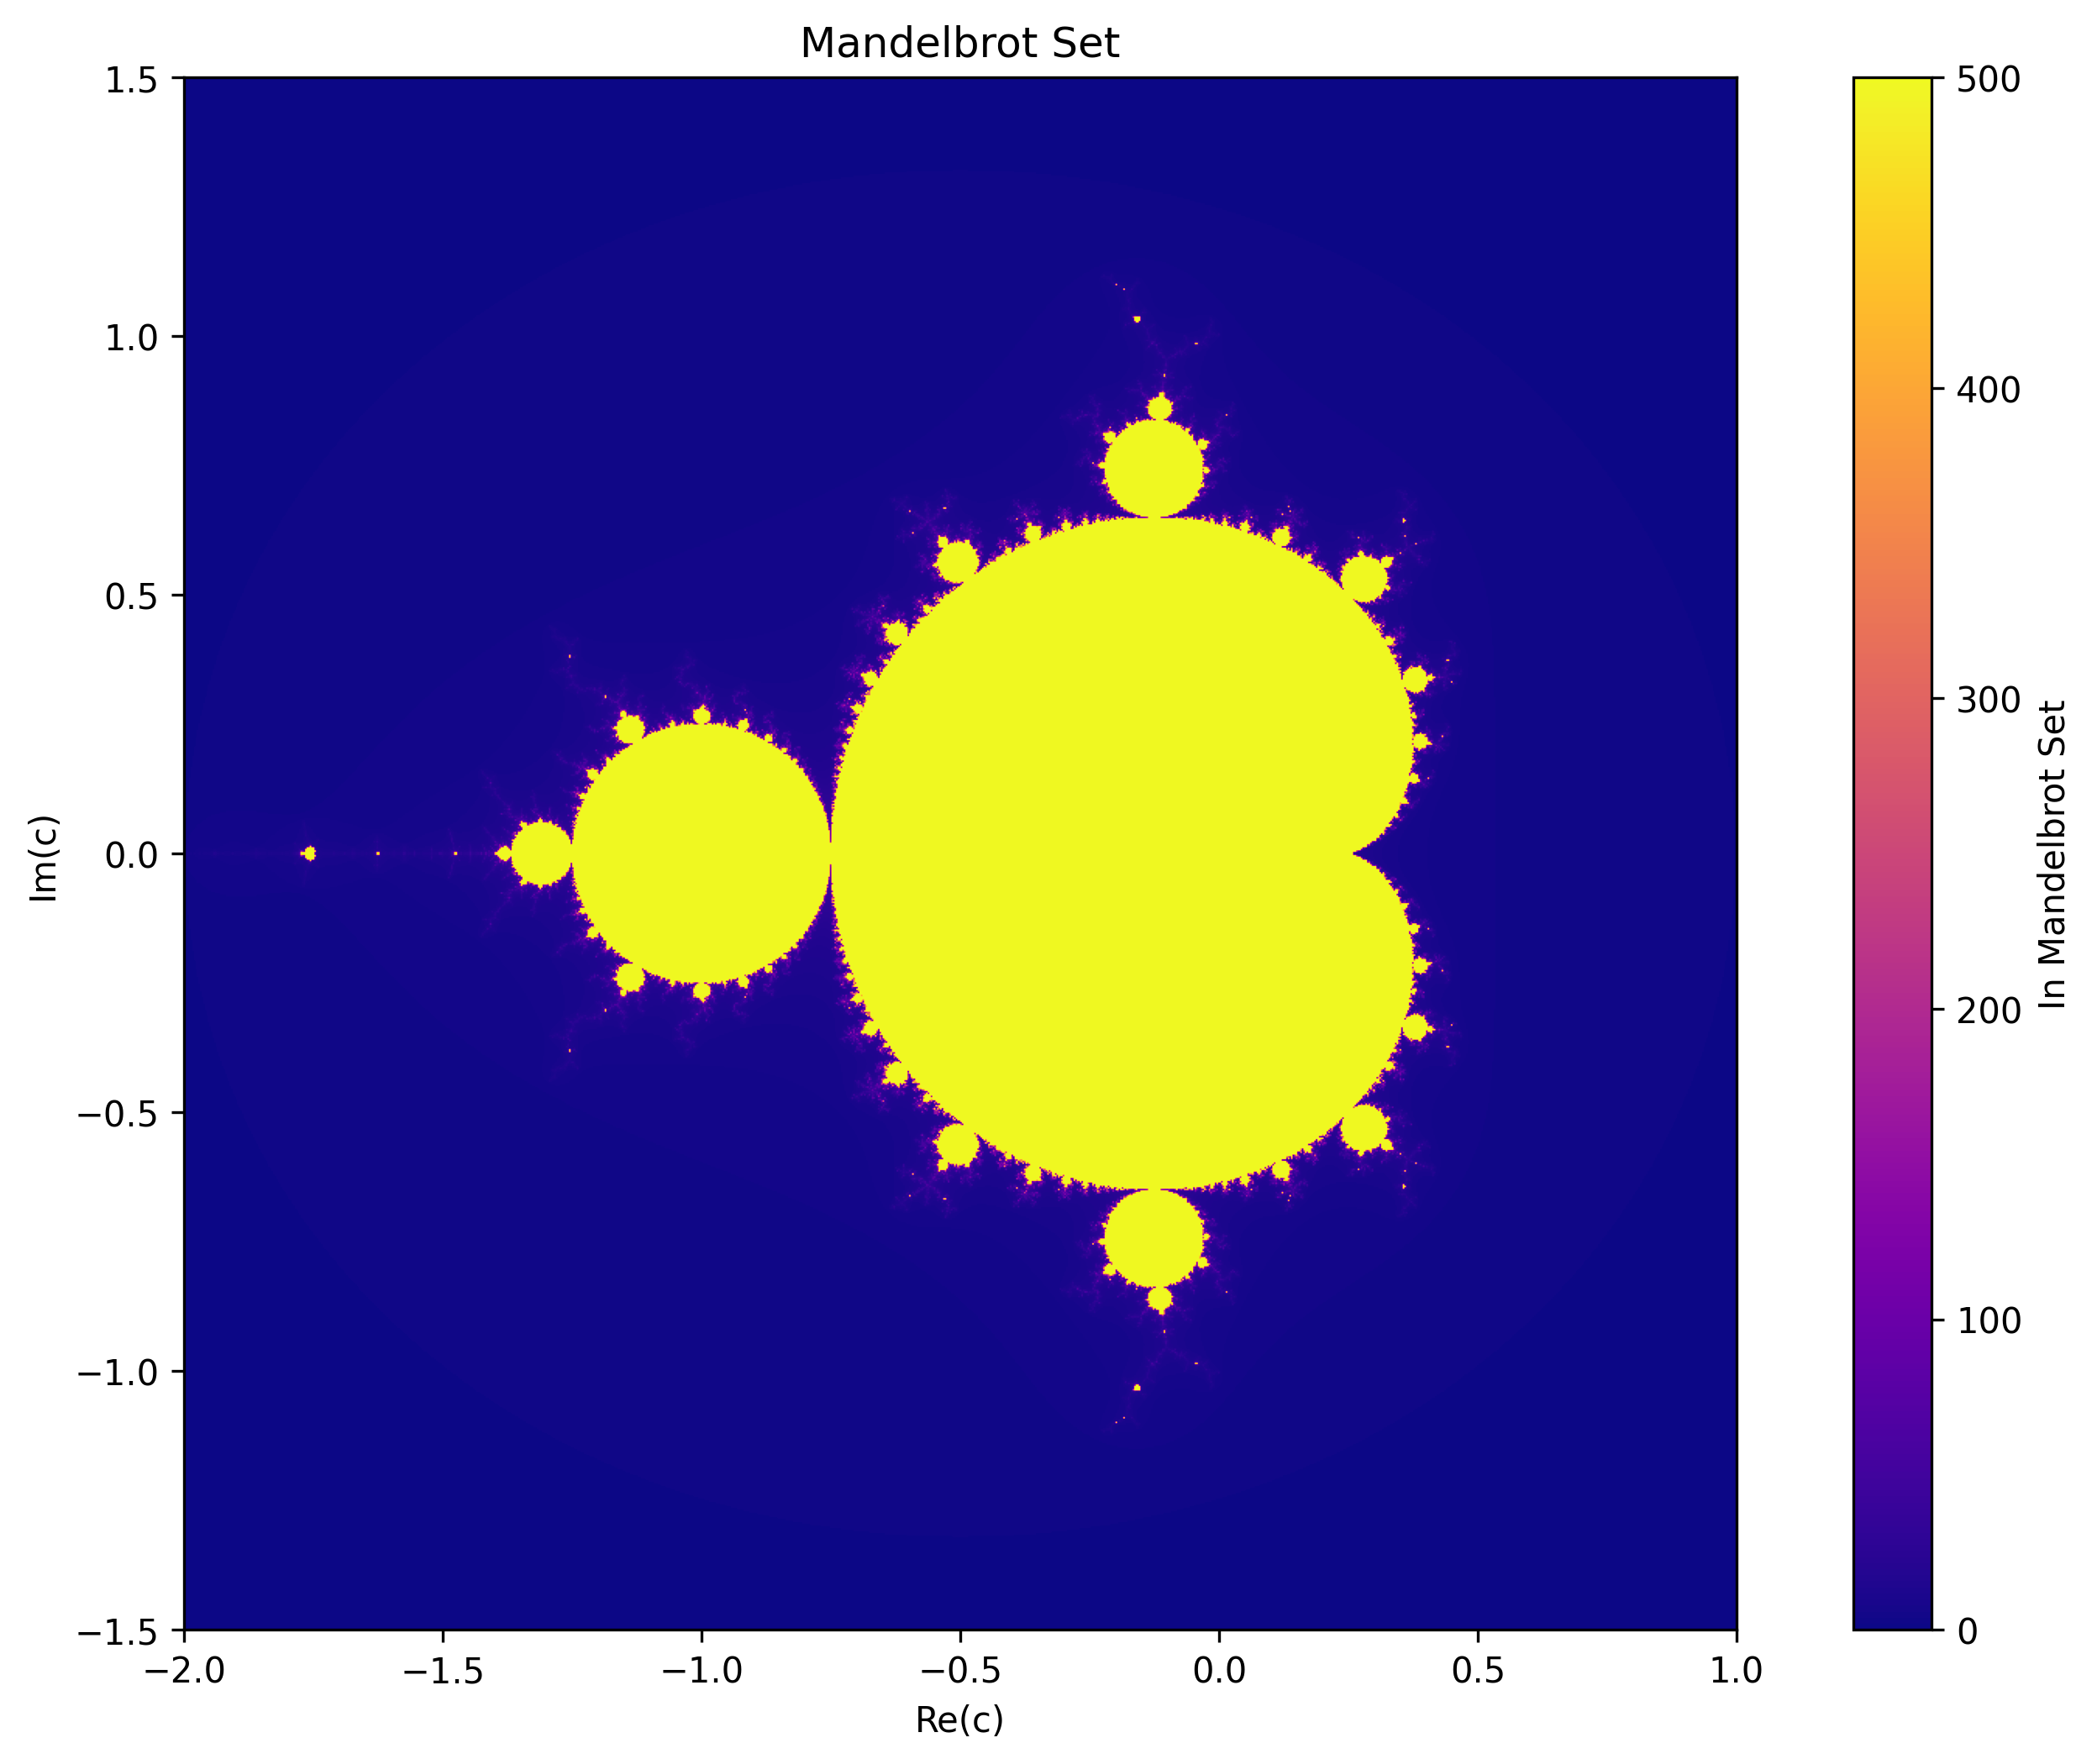

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Setting up the imaginary point set
real = np.linspace(-2.0, 1.0, 1000)
imag = np.linspace(-1.5, 1.5, 1000)

# Create a 2D grid of complex numbers c
real_grid, imag_grid = np.meshgrid(real, imag)
c_points = real_grid + 1j * imag_grid

max_iter = 500
escape_radius = 2
iteration_count = np.zeros(c_points.shape)
mandelbrot_set = np.zeros(c_points.shape, dtype=bool)

for i in range(c_points.shape[0]):
    for j in range(c_points.shape[1]):
        c = c_points[i, j]
        z = 0
        for iteration in range(max_iter):
            z = z**2 + c
            if abs(z) > escape_radius:
                mandelbrot_set[i, j] = False
                iteration_count[i, j] =iteration
                break
        else:
            mandelbrot_set[i, j] = True
            iteration_count[i, j] = max_iter


plt.figure(figsize=(12, 8), dpi=300)
plt.imshow(iteration_count, extent=(-2.0, 1.0, -1.5, 1.5), cmap='plasma', origin='lower')
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.title("Mandelbrot Set")
plt.colorbar(label="In Mandelbrot Set")
plt.show()
            

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_17976\2508629059.py:57: RuntimeWarning: divide by zero encountered in log
  smooth_iter = iteration_count + 1 - np.log(np.log(np.abs(iteration_count)))/np.log(2)
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_17976\2508629059.py:57: RuntimeWarning: invalid value encountered in log
  smooth_iter = iteration_count + 1 - np.log(np.log(np.abs(iteration_count)))/np.log(2)


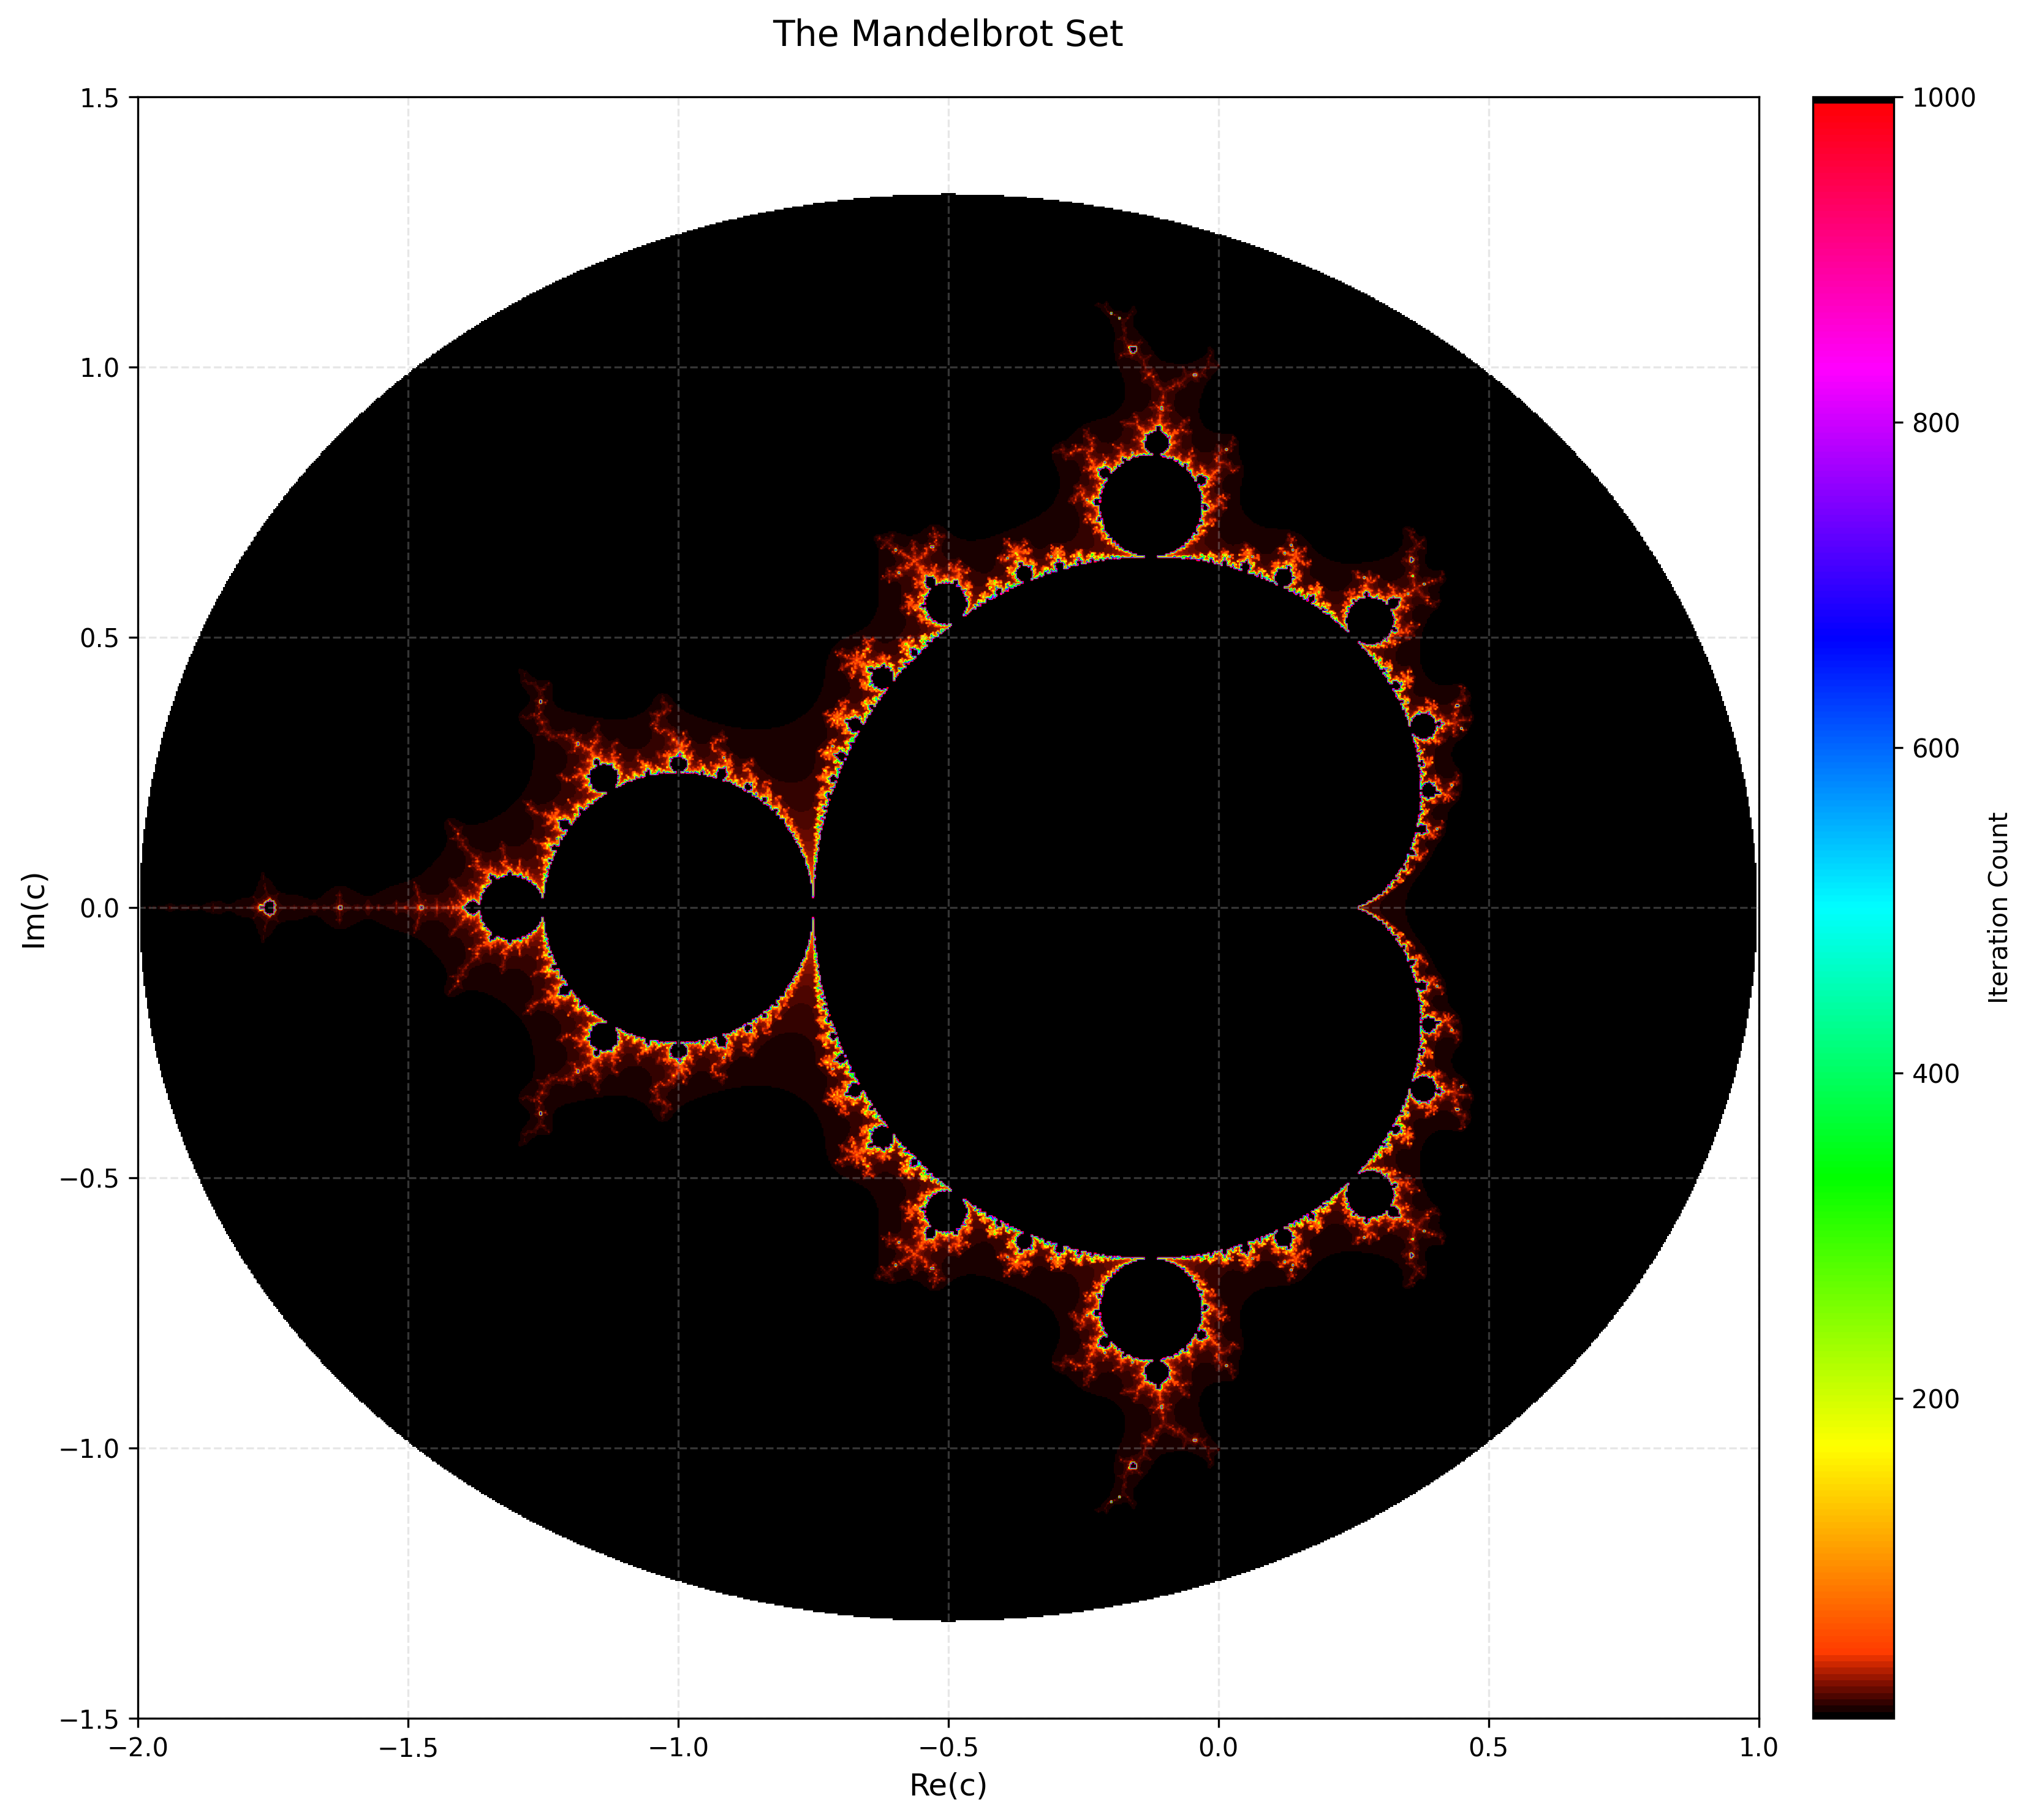

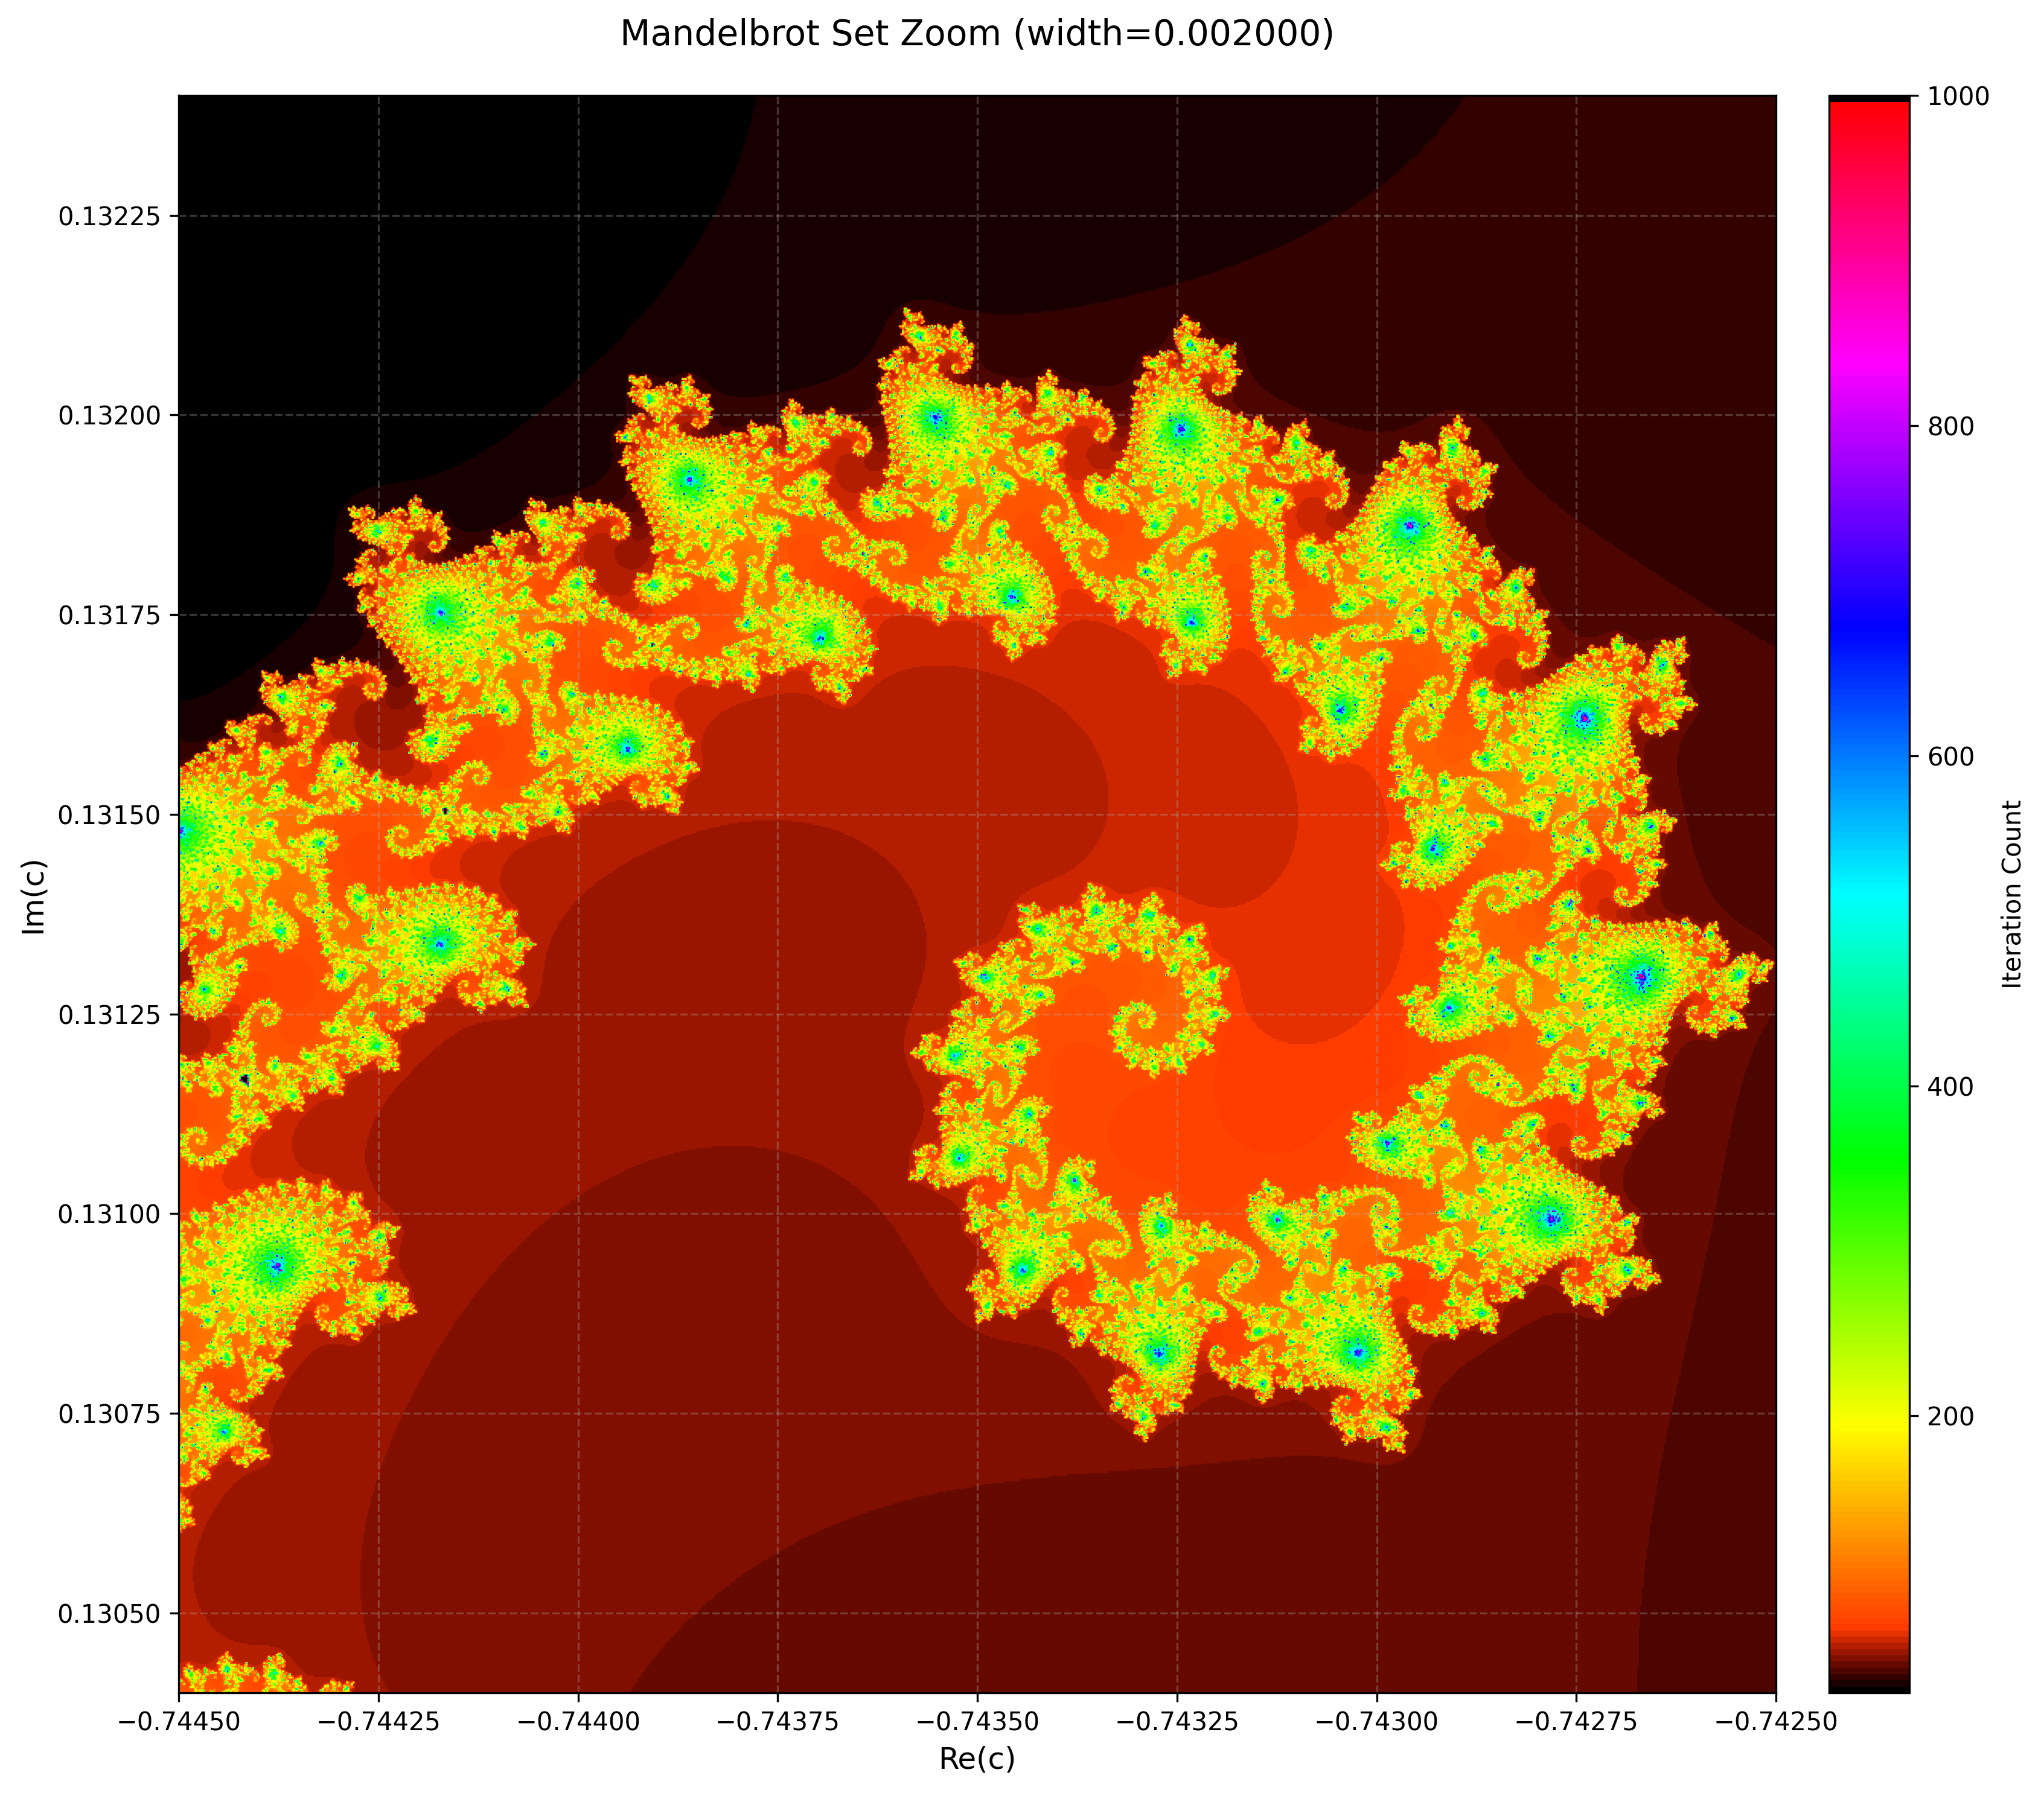

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import colorsys

def mandelbrot_iteration(c, max_iter, escape_radius):
    z = 0
    for n in range(max_iter):
        z = z*z + c
        if abs(z) > escape_radius:
            return n
    return max_iter

def compute_mandelbrot(real, imag, max_iter, escape_radius):
    height, width = len(imag), len(real)
    iteration_count = np.zeros((height, width), dtype=np.int64)
    
    # Create a mesh grid for vectorized computation
    real_grid, imag_grid = np.meshgrid(real, imag)
    c = real_grid + 1j * imag_grid
    z = np.zeros_like(c, dtype=np.complex128)
    
    for i in range(max_iter):
        mask = np.abs(z) <= escape_radius
        z[mask] = z[mask]**2 + c[mask]
        iteration_count[mask] = i
    
    # Set points that never escaped to max_iter
    iteration_count[np.abs(z) <= escape_radius] = max_iter
    
    return iteration_count

def create_custom_colormap():
    # Create colors for our custom colormap
    colors = []
    for i in range(256):
        # Convert HSV to RGB, cycling through hues
        hue = i/256
        saturation = 1.0
        value = 1.0 if i > 10 else i/10.0  # Darker colors for low iteration counts
        rgb = colorsys.hsv_to_rgb(hue, saturation, value)
        colors.append(rgb)
    
    # Add black for the Mandelbrot set itself
    colors.append((0, 0, 0))
    
    return LinearSegmentedColormap.from_list('custom', colors)

def plot_mandelbrot(iteration_count, real_range, imag_range, max_iter, 
                   zoom_center=None, zoom_width=None, title="Enhanced Mandelbrot Set"):
    plt.figure(figsize=(15, 10), dpi=300)
    
    # Create the plot with a custom colormap
    custom_cmap = create_custom_colormap()
    
    # Normalize iteration counts for smoother color transitions
    smooth_iter = iteration_count + 1 - np.log(np.log(np.abs(iteration_count)))/np.log(2)
    smooth_iter[iteration_count == max_iter] = max_iter
    
    # Plot with enhanced aesthetics
    plt.imshow(smooth_iter, 
              extent=(real_range[0], real_range[-1], imag_range[0], imag_range[-1]),
              cmap=custom_cmap,
              origin='lower',
              aspect='equal')
    
    # Add gridlines
    plt.grid(True, alpha=0.3, linestyle='--')
    
    # Enhance labels and title
    plt.xlabel("Re(c)", fontsize=12)
    plt.ylabel("Im(c)", fontsize=12)
    plt.title(title, fontsize=14, pad=20)
    
    # Add colorbar with custom label
    cbar = plt.colorbar(label="Iteration Count", pad=0.02)
    cbar.ax.set_ylabel("Iteration Count", fontsize=10)
    
    # Add zoom box if specified
    if zoom_center and zoom_width:
        zoom_rect = plt.Rectangle(
            (zoom_center[0] - zoom_width/2, zoom_center[1] - zoom_width/2),
            zoom_width, zoom_width,
            fill=False, color='white', linestyle='--'
        )
        plt.gca().add_patch(zoom_rect)
    
    plt.tight_layout()
    return plt.gcf()

# Parameters for the main plot
# Reduced resolution for faster computation since we don't have Numba
real = np.linspace(-2.0, 1.0, 1000)  
imag = np.linspace(-1.5, 1.5, 1000)
max_iter = 1000
escape_radius = 2.0

# Compute the main Mandelbrot set
iteration_count = compute_mandelbrot(real, imag, max_iter, escape_radius)

# Create main plot
main_plot = plot_mandelbrot(iteration_count, real, imag, max_iter, 
                           title="The Mandelbrot Set")
plt.show()

# Create a zoomed plot of an interesting region
zoom_center = (-0.7435, 0.1314)
zoom_width = 0.002

# Calculate new ranges for zoom
zoom_real = np.linspace(zoom_center[0] - zoom_width/2, 
                       zoom_center[0] + zoom_width/2, 1000)
zoom_imag = np.linspace(zoom_center[1] - zoom_width/2, 
                       zoom_center[1] + zoom_width/2, 1000)

# Compute zoomed region
zoom_iteration_count = compute_mandelbrot(zoom_real, zoom_imag, max_iter, escape_radius)

# Create zoomed plot
zoom_plot = plot_mandelbrot(zoom_iteration_count, zoom_real, zoom_imag, max_iter,
                           title=f"Mandelbrot Set Zoom (width={zoom_width:.6f})")
plt.show()